# Diabetes Case study

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,RandomizedSearchCV
%matplotlib inline

In [4]:
data=pd.read_csv('D:/Ai/Data_science/DSND_Term1-master/lessons/Supervised/5_TrainingTuning/diabetes.csv')

# Exploratory Data analysis

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


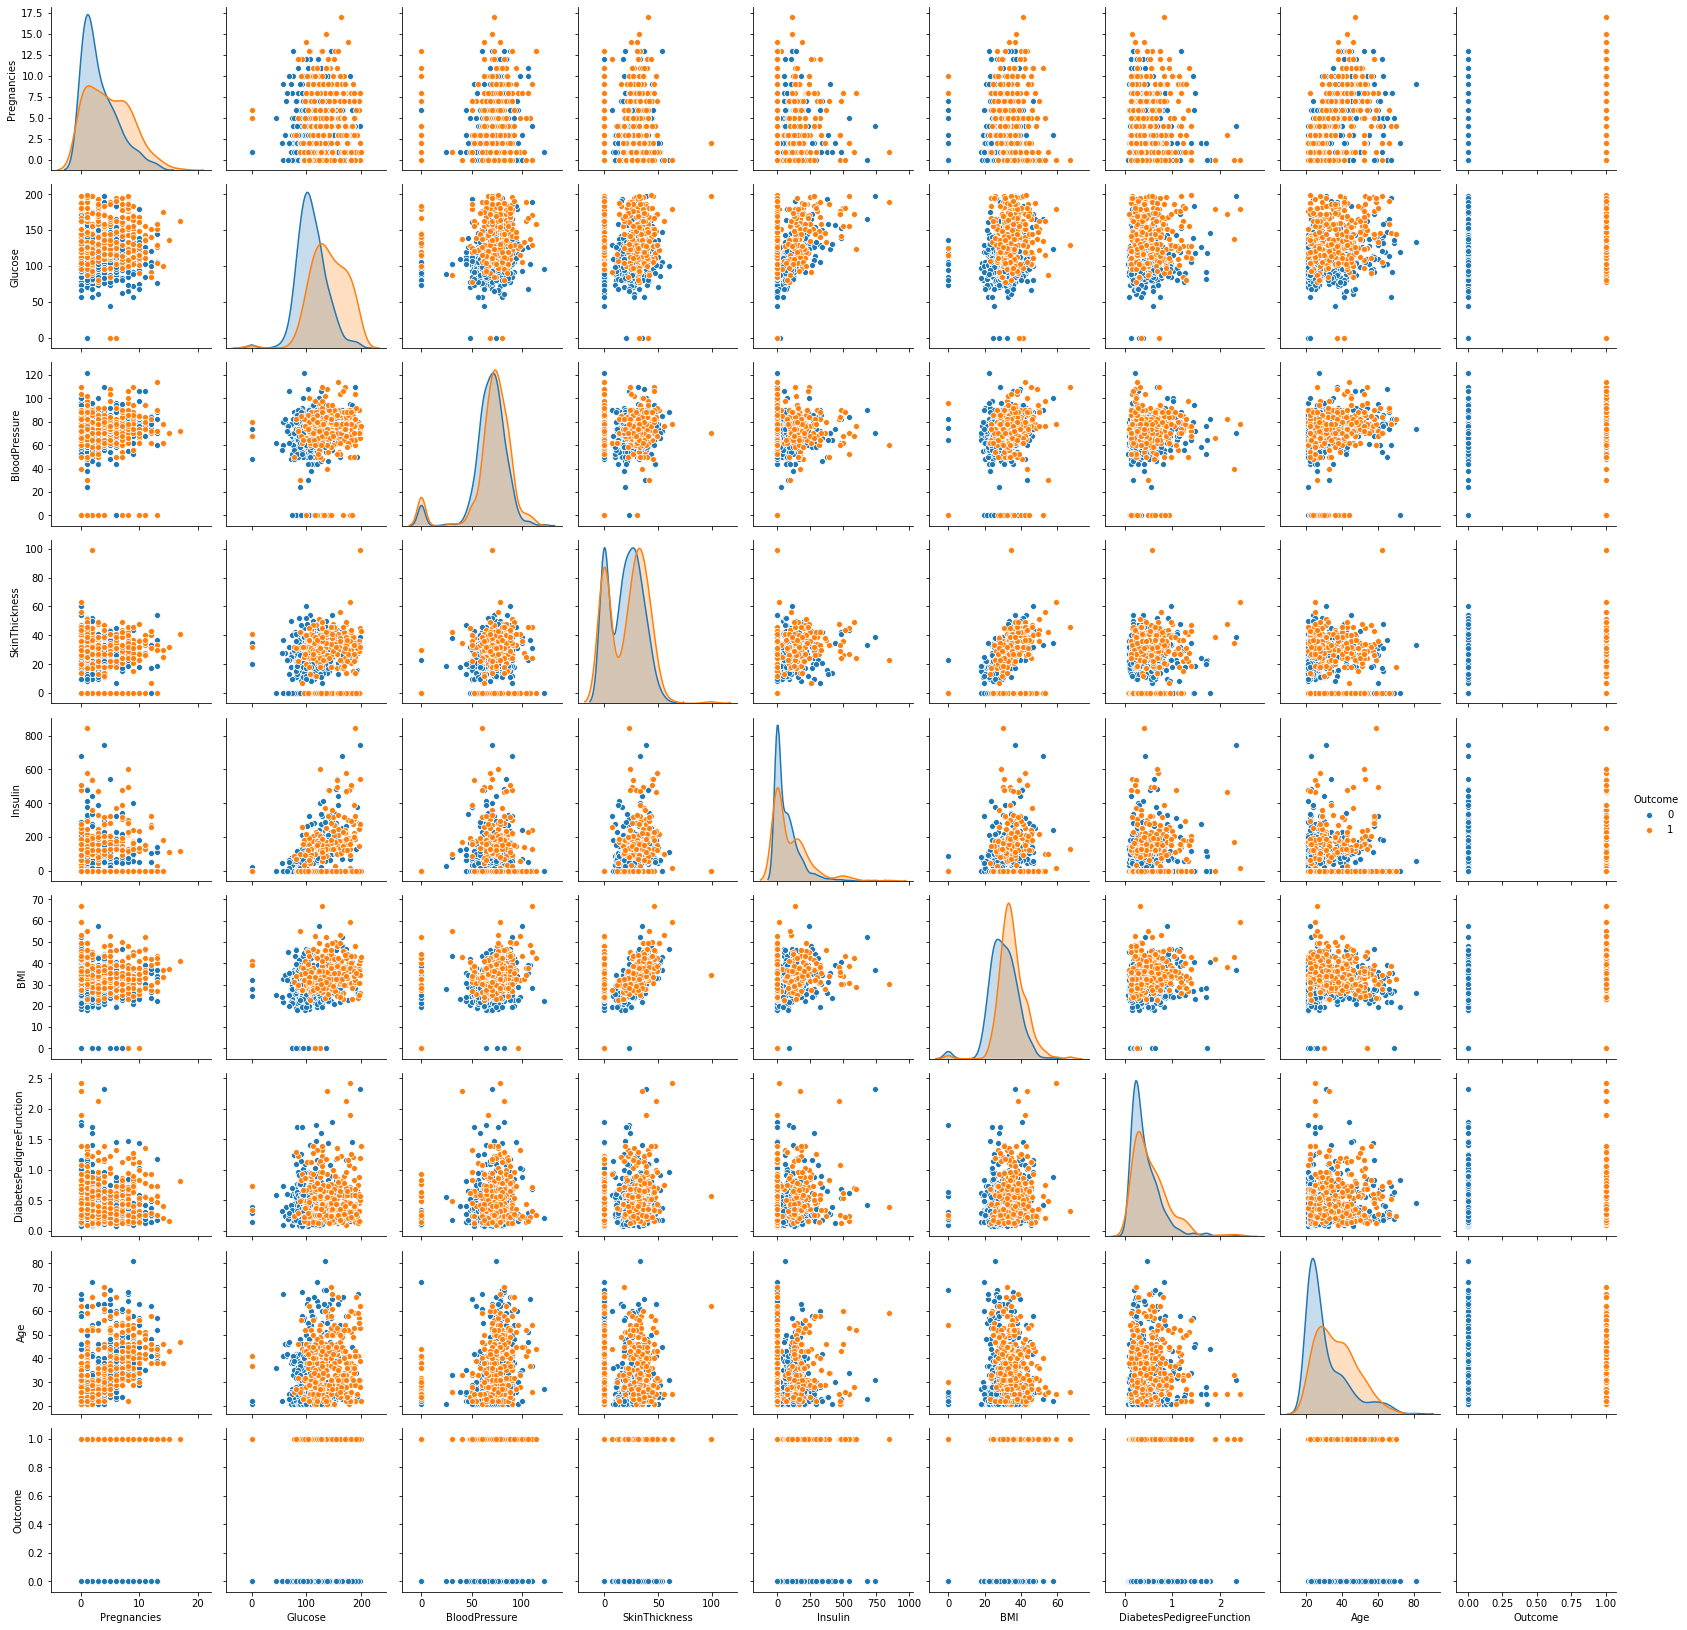

In [34]:
sns.pairplot(data,hue="Outcome",vars=data.columns)

In [18]:
corr=data.corr()

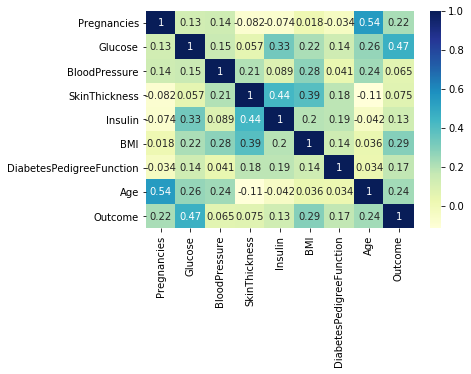

In [22]:
sns.heatmap(corr,cbar=True,cmap="YlGnBu",annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000034C24C08>,
      dtype=object)

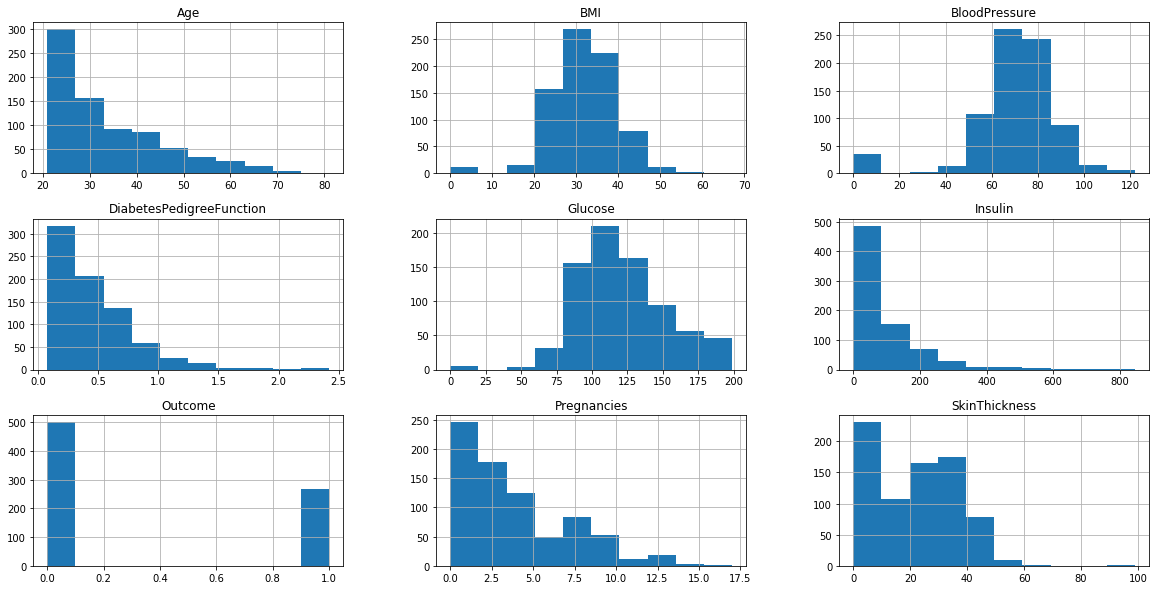

In [36]:
data.hist(figsize=(20,10))

# Trainning and model building

In [37]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [42]:
random_forest=RandomForestClassifier()

parameter={'n_estimators':list(range(10,200)),
                               'max_depth':[None,3],
                               'min_samples_split':list(range(2,10)),
                               'min_samples_leaf':list(range(2,10)),
                               "max_features": list(range(1, X_test.shape[1]+1)),
                               "bootstrap": [True, False],
                               "criterion": ["gini", "entropy"]}

random_search=RandomizedSearchCV(random_forest,param_distributions=parameter)

random_search.fit(X_train,y_train)

X_test_predict=random_search.best_estimator_.predict(X_test)
print("Accuracy: ",accuracy_score(X_test_predict,y_test))
print("Precision: ",precision_score(X_test_predict,y_test))
print("recall: ",recall_score(X_test_predict,y_test))
print("f1score: ",f1_score(X_test_predict,y_test))

Accuracy:  0.7467532467532467
Precision:  0.6363636363636364
recall:  0.6481481481481481
f1score:  0.6422018348623852
